In [18]:
# SOURCES:

# https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html

# https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%207.ipynb

# https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/ 

import pandas as pd

wageData = pd.read_csv('Wage.csv')
wageData.head()

Unnamed: 0  year  age            maritl      race        education  \
0      231655  2006   18  1. Never Married  1. White     1. < HS Grad   
1       86582  2004   24  1. Never Married  1. White  4. College Grad   
2      161300  2003   45        2. Married  1. White  3. Some College   
3      155159  2003   43        2. Married  3. Asian  4. College Grad   
4       11443  2005   50       4. Divorced  1. White       2. HS Grad   

               region        jobclass          health health_ins   logwage  \
0  2. Middle Atlantic   1. Industrial       1. <=Good      2. No  4.318063   
1  2. Middle Atlantic  2. Information  2. >=Very Good      2. No  4.255273   
2  2. Middle Atlantic   1. Industrial       1. <=Good     1. Yes  4.875061   
3  2. Middle Atlantic  2. Information  2. >=Very Good     1. Yes  5.041393   
4  2. Middle Atlantic  2. Information       1. <=Good     1. Yes  4.318063   

         wage  
0   75.043154  
1   70.476020  
2  130.982177  
3  154.685293  
4   75.043154

[Text(0, 0.5, 'Mean wage')]

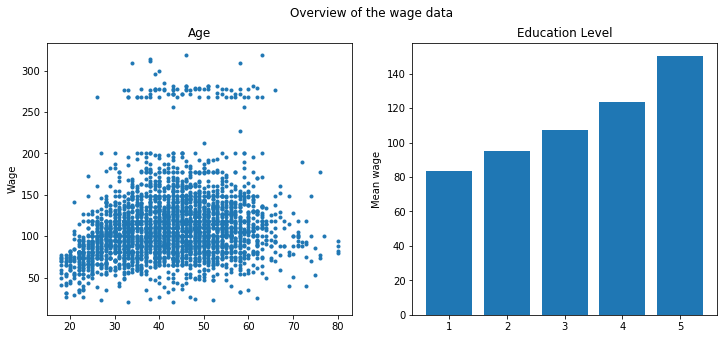

In [40]:
import matplotlib.pyplot as plt
from statistics import mean

x_age = wageData.age
y = wageData.wage

edu = wageData.education
y_meanWage_EL1 = []
y_meanWage_EL2 = []
y_meanWage_EL3 = []
y_meanWage_EL4 = []
y_meanWage_EL5 = []

for i in range(0,len(edu)):
    if int(wageData.education[i][0]) == 1:
        y_meanWage_EL1.append(int(wageData.wage[i]))
    elif int(wageData.education[i][0]) == 2:
        y_meanWage_EL2.append(int(wageData.wage[i]))
    elif int(wageData.education[i][0]) == 3:
        y_meanWage_EL3.append(int(wageData.wage[i]))
    elif int(wageData.education[i][0]) == 4:
        y_meanWage_EL4.append(int(wageData.wage[i]))
    elif int(wageData.education[i][0]) == 5:
        y_meanWage_EL5.append(int(wageData.wage[i]))

meanWages = [mean(y_meanWage_EL1), mean(y_meanWage_EL2), mean(y_meanWage_EL3), mean(y_meanWage_EL4), mean(y_meanWage_EL5)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Overview of the wage data')
ax1.scatter(x_age,y, marker='.')
ax2.bar([1,2,3,4,5], meanWages)
ax1.set_title('Age')
ax2.set_title('Education Level')
ax1.set(ylabel='Wage')
ax2.set(ylabel='Mean wage')

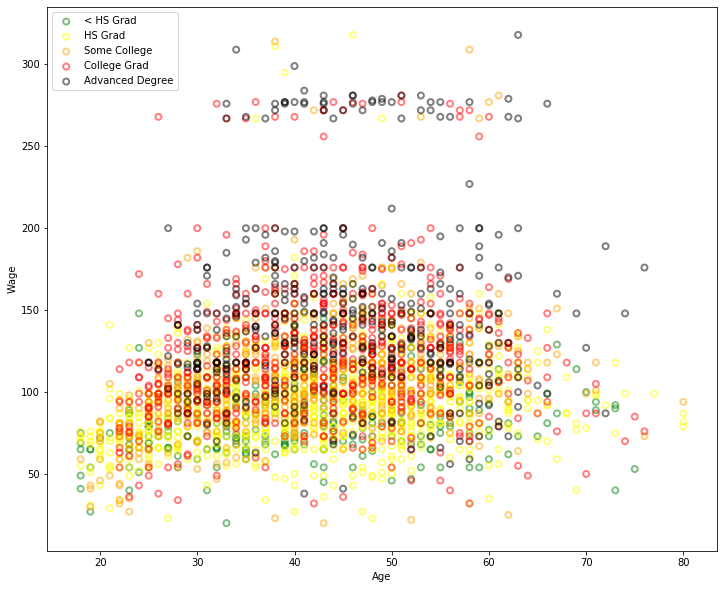

In [38]:
x_age_EL1 = []
y_wage_EL1 = []
x_age_EL2 = []
y_wage_EL2 = []
x_age_EL3 = []
y_wage_EL3 = []
x_age_EL4 = []
y_wage_EL4 = []
x_age_EL5 = []
y_wage_EL5 = []

for i in range(0,len(edu)):
    if int(wageData.education[i][0]) == 1:
        x_age_EL1.append(int(wageData.age[i]))
        y_wage_EL1.append(int(wageData.wage[i]))
    elif int(wageData.education[i][0]) == 2:
        x_age_EL2.append(int(wageData.age[i]))
        y_wage_EL2.append(int(wageData.wage[i]))
    elif int(wageData.education[i][0]) == 3:
        x_age_EL3.append(int(wageData.age[i]))
        y_wage_EL3.append(int(wageData.wage[i]))
    elif int(wageData.education[i][0]) == 4:
        x_age_EL4.append(int(wageData.age[i]))
        y_wage_EL4.append(int(wageData.wage[i]))
    elif int(wageData.education[i][0]) == 5:
        x_age_EL5.append(int(wageData.age[i]))
        y_wage_EL5.append(int(wageData.wage[i]))

alphalevel = 0.5
linewidth = 2

plt.rcParams["figure.figsize"] = (12,10)
plt.scatter(x_age_EL1,y_wage_EL1, facecolor = 'None', edgecolor = 'green',label='< HS Grad', alpha=alphalevel, linewidths=linewidth)
plt.scatter(x_age_EL2,y_wage_EL2, facecolor = 'None', edgecolor='yellow', label='HS Grad', alpha=alphalevel, linewidths=linewidth)
plt.scatter(x_age_EL3,y_wage_EL3, facecolor = 'None', edgecolor='orange', label='Some College', alpha=alphalevel, linewidths=linewidth)
plt.scatter(x_age_EL4,y_wage_EL4, facecolor = 'None', edgecolor='red', label='College Grad', alpha=alphalevel, linewidths=linewidth)
plt.scatter(x_age_EL5,y_wage_EL5, facecolor = 'None', edgecolor='black', label='Advanced Degree', alpha=alphalevel,linewidths=linewidth)
plt.xlabel('Age')
plt.ylabel('Wage')
plt.legend(loc='upper left')

In [21]:
## CREATING CUBIC SPLINES WITH 3 AND 4 KNOTS

from patsy import dmatrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Splitting the data into validation and training
train_x, valid_x, train_y, valid_y = train_test_split(wageData.age, wageData.wage, test_size=0.2, random_state = 1)

## CUBIC SPLINE WITH 3 KNOTS
# Generating cubic spline with 3 knots at 25, 40 and 60
transformed_x = dmatrix("bs(train, knots=(25,40,60), degree=3, include_intercept=False)", {"train": train_x},return_type='dataframe')

# Fitting Generalised linear model on transformed dataset
fit1 = sm.GLM(train_y, transformed_x).fit()

# Predictions
pred1 = fit1.predict(dmatrix("bs(valid, knots=(25,40,60), include_intercept=False)", {"valid": valid_x}, return_type='dataframe'))

# Calculating RMSE values
rms1 = sqrt(mean_squared_error(valid_y, pred1))
print('RMSE value for spline with 3 knots: ', "%.3f" % rms1)

# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)

# Make some predictions
pred1 = fit1.predict(dmatrix("bs(xp, knots=(25,40,60), include_intercept=False)", {"xp": xp}, return_type='dataframe'))

## CUBIC SPLINE WITH 4 KNOTS.
# Same approach:

# Generating cubic spline with 4 knots
transformed_x2 = dmatrix("bs(train, knots=(25,40,50,65),degree =3, include_intercept=False)", {"train": train_x}, return_type='dataframe')

# Fitting Generalised linear model on transformed dataset
fit2 = sm.GLM(train_y, transformed_x2).fit()

# Predictions
pred2 = fit2.predict(dmatrix("bs(valid, knots=(25,40,50,65),degree =3, include_intercept=False)", {"valid": valid_x}, return_type='dataframe'))

# RMSE value
rms2 = sqrt(mean_squared_error(valid_y, pred2))
print('RMSE value for spline with 4 knots: ', "%.3f" % rms2)

# Predictions
pred2 = fit2.predict(dmatrix("bs(xp, knots=(25,40,50,65),degree =3, include_intercept=False)", {"xp": xp}, return_type='dataframe'))

RMSE value for spline with 3 knots:  39.451
RMSE value for spline with 4 knots:  39.425


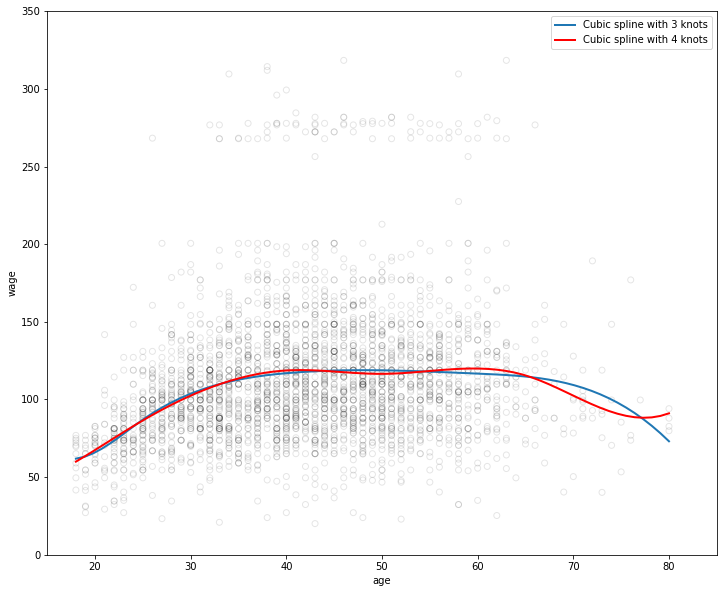

In [22]:
# Plot the splines
plt.scatter(wageData.age, wageData.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred1, label='Cubic spline with 3 knots', lw=2)
plt.plot(xp, pred2, color='r', label='Cubic spline with 4 knots', lw=2)
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()

In [23]:
# CREATING NATURAL CUBIC SPLINES

# 3 Degrees of freedom, i.e. 3 knots
transformed_x3 = dmatrix("cr(train,df = 3)", {"train": train_x}, return_type='dataframe')
fit3 = sm.GLM(train_y, transformed_x3).fit()

# Prediction on validation set
pred3 = fit3.predict(dmatrix("cr(valid, df=3)", {"valid": valid_x}, return_type='dataframe'))

# Calculating RMSE value
rms = sqrt(mean_squared_error(valid_y, pred3))
print(rms)

# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred3 = fit3.predict(dmatrix("cr(xp, df=3)", {"xp": xp}, return_type='dataframe'))

# 4 Degrees of freedom, i.e. 4 knots
transformed_x4 = dmatrix("cr(train,df = 4)", {"train": train_x}, return_type='dataframe')
fit4 = sm.GLM(train_y, transformed_x4).fit()

# Prediction on validation set
pred4 = fit4.predict(dmatrix("cr(valid, df=4)", {"valid": valid_x}, return_type='dataframe'))

# Calculating RMSE value
rms = sqrt(mean_squared_error(valid_y, pred4))
print(rms)

# We will plot the graph for 70 observations only
xp = np.linspace(valid_x.min(),valid_x.max(),70)
pred4 = fit4.predict(dmatrix("cr(xp, df=4)", {"xp": xp}, return_type='dataframe'))

39.48345667993365
39.49434488298993


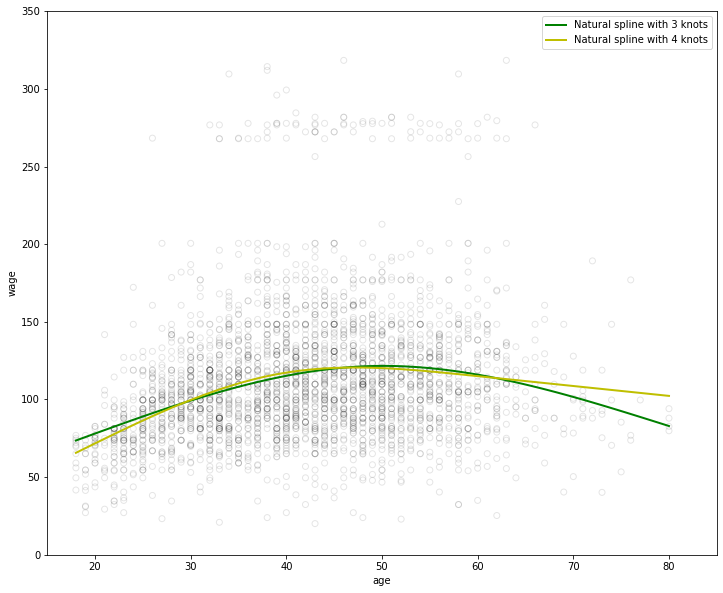

In [24]:
# Plot the natural spline
plt.scatter(wageData.age, wageData.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred3,color='g', label='Natural spline with 3 knots', lw=2)
plt.plot(xp, pred4,color='y', label='Natural spline with 4 knots', lw=2)
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()

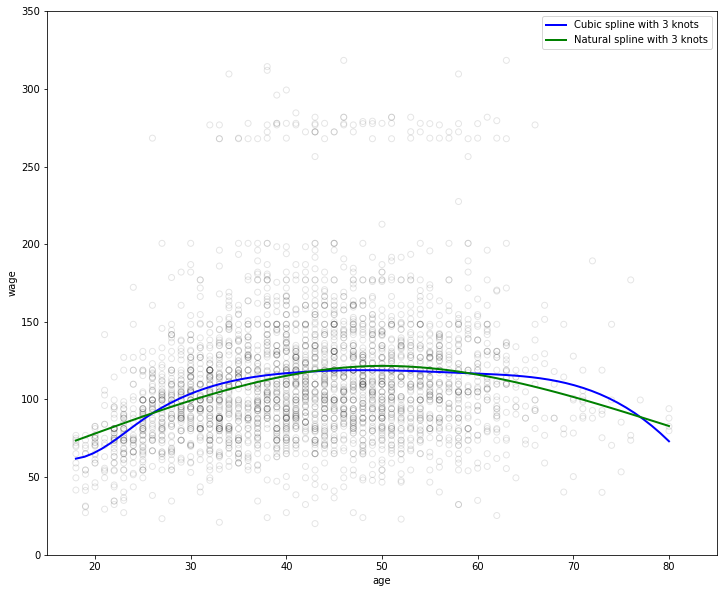

In [25]:
# Comparing natural and cubic splines
plt.scatter(wageData.age, wageData.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred1, label='Cubic spline with 3 knots', lw=2, color = 'b')
plt.plot(xp,pred3, label='Natural spline with 3 knots', lw=2, color = 'g')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()

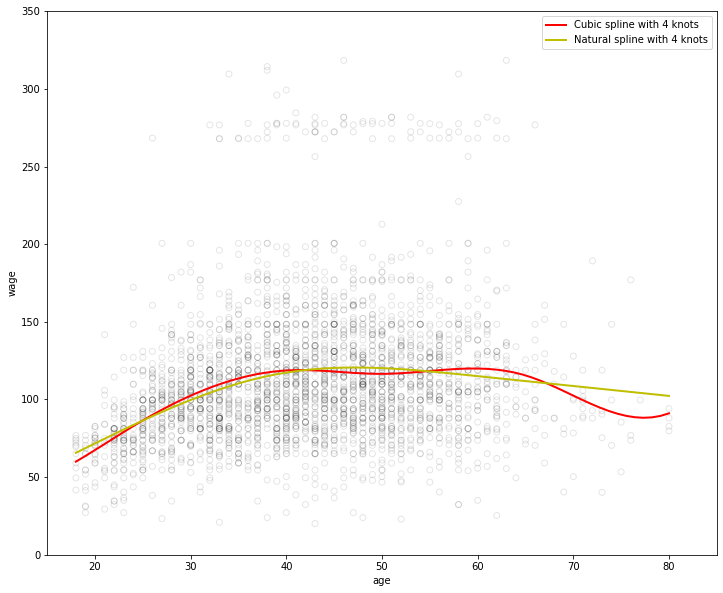

In [26]:
plt.scatter(wageData.age, wageData.wage, facecolor='None', edgecolor='k', alpha=0.1)
plt.plot(xp, pred2, label='Cubic spline with 4 knots', lw=2, color = 'r')
plt.plot(xp,pred4, label='Natural spline with 4 knots', lw=2, color = 'y')
plt.legend()
plt.xlim(15,85)
plt.ylim(0,350)
plt.xlabel('age')
plt.ylabel('wage')
plt.show()